# 1.5 Data Visualization for Sales by Store by Meal



# Import libraries

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

import psycopg2

# Supporting code

Function that helps connect to the database, run query, return data in dataframe, and fix int datatype.

In [2]:
def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
# connect to the database
connection = psycopg2.connect(
    user = "",
    password = "",
    host = "",
    port = "",
    database = ""
)

# Data Visualization of Query

In [13]:
rollback_before_flag = True
rollback_after_flag = True

# Crosstab of sales by store by meal

query = """

select *
from crosstab(
    '
        select store_name, meal_name, total_meals_purchased
        from 
            (
                select st.city as store_name,
                       p.description as meal_name,
                        sum(l.quantity) as total_meals_purchased
                from stores as st
                     join sales as sa
                        on st.store_id = sa.store_id
                     join line_items as l
                        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
                     join products as p
                        on l.product_id = p.product_id
                group by store_name, meal_name
                order by store_name, meal_name
            ) as a
    ')
as ("store_name" varchar, "Brocolli Stir Fry" numeric, "Chicken Salad" numeric,
        "Curry Chicken" numeric, "Eggplant Lasagna" numeric, "Pistachio Salmon" numeric,
        "Spinach Orzo" numeric, "Teriyaki Chicken" numeric, "Tilapia Piccata" numeric)

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,store_name,Brocolli Stir Fry,Chicken Salad,Curry Chicken,Eggplant Lasagna,Pistachio Salmon,Spinach Orzo,Teriyaki Chicken,Tilapia Piccata
0,Berkeley,232038,57719,346508,405637,464274,115469,290858,174252
1,Dallas,179885,44756,269689,314383,359615,89644,224932,134451
2,Miami,164027,41005,244719,286676,327613,82047,204953,123327
3,Nashville,134805,33939,202178,235703,269694,67689,168664,101759
4,Seattle,203229,51142,305790,356659,407582,101920,255606,153448


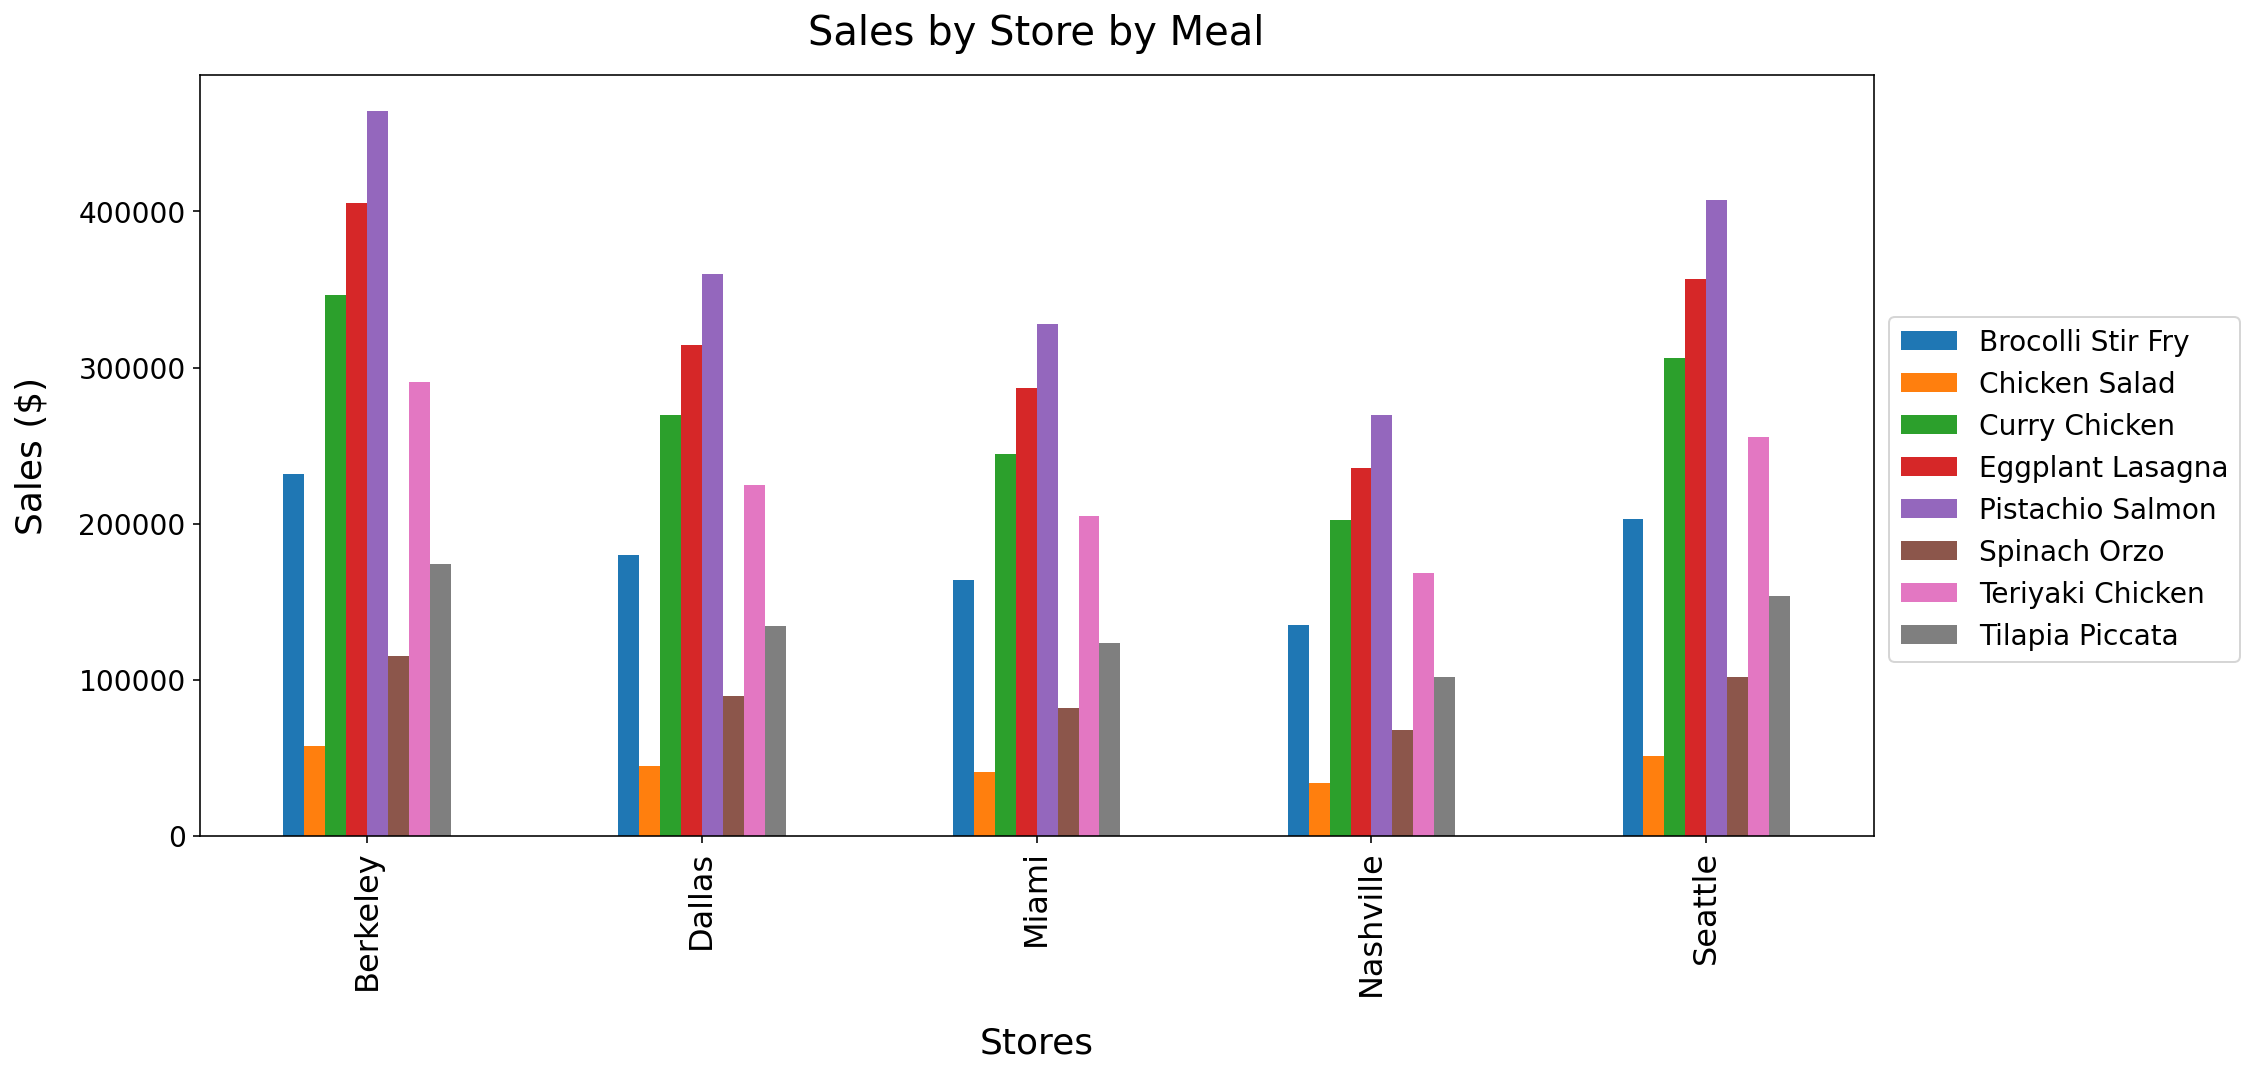

In [26]:
# plot of crosstab of sales by store by meal
df.plot.bar(figsize=(15,7))

plt.title('Sales by Store by Meal', fontsize=20, pad=15)
plt.xlabel('Stores', fontsize=18, labelpad=15)
plt.ylabel('Sales ($)', fontsize=18, labelpad=15)
plt.xticks(np.arange(5), labels=df['store_name'], fontsize=16)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.001, 0.7), fontsize=14)
plt.show()